<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore', 'use_inf_as_na option is deprecated', category=FutureWarning)

Load the dataset into a dataframe.


In [25]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
6,20,"I am not primarily a developer, but I write co...",No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,Not applicable - I did not use Stack Overflow ...,Tech articles written by other developers,38.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
8,23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropr

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


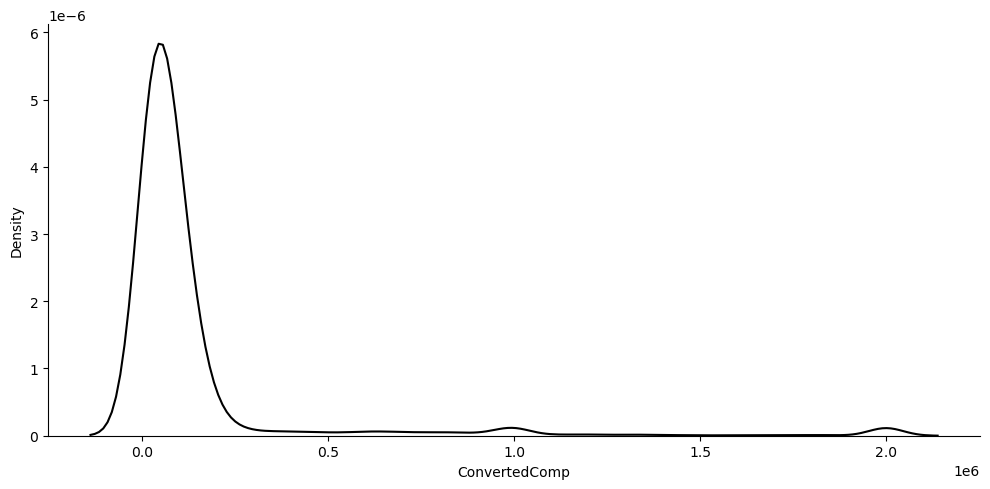

In [26]:
sns.displot(data=df['ConvertedComp'], kind='kde', aspect=2, color='black')

Plot the histogram for the column `ConvertedComp`.


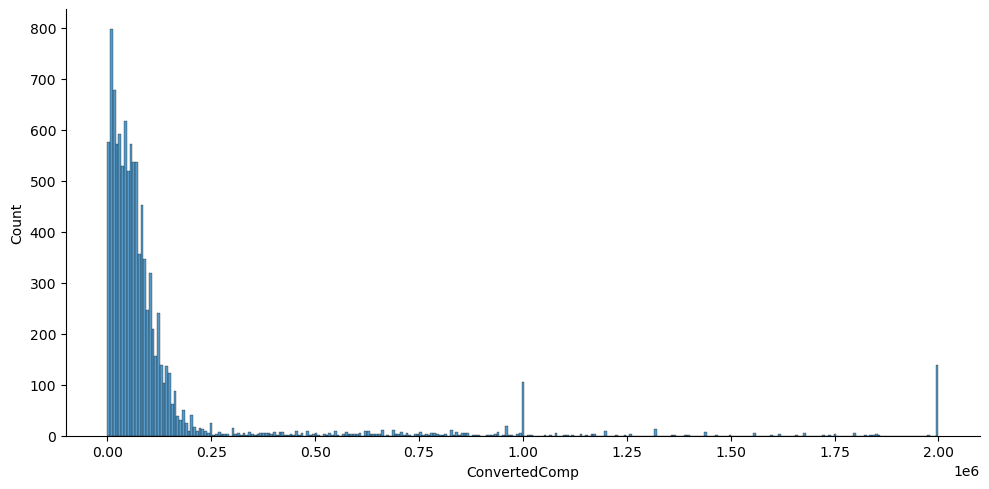

In [27]:
sns.displot(data=df['ConvertedComp'], kind='hist', aspect=2)

What is the median of the column `ConvertedComp`?


In [28]:
print(f"The median of ConvertedComp is: {df['ConvertedComp'].median()}")

The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [29]:
print(f"The number of Man respondent: {df['Gender'].value_counts().iloc[0]}")

The number of Man respondent: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [30]:
print(f"The median ConvertedComp for respondents who identify as a Woman is: {df['ConvertedComp'][df['Gender'] == 'Woman'].median()}")

The median ConvertedComp for respondents who identify as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [31]:
df['Age'].describe().iloc[3:]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


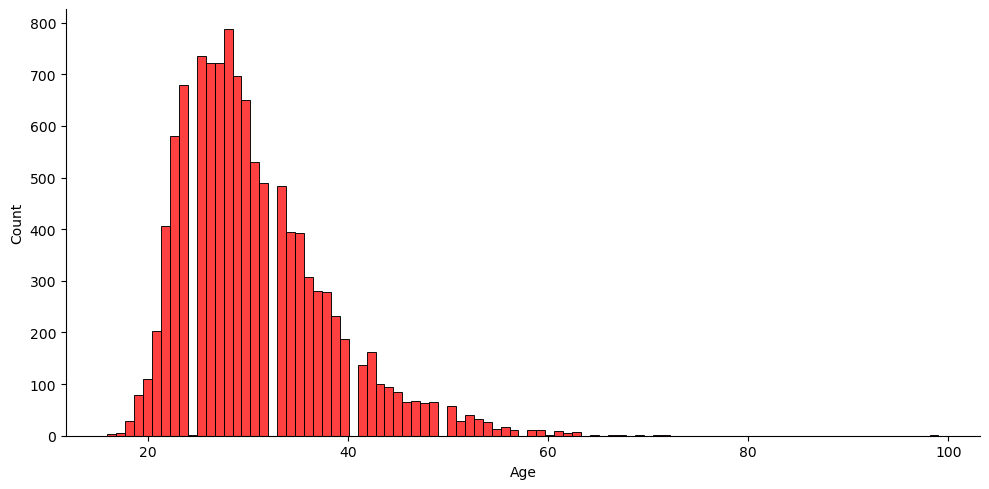

In [32]:
sns.displot(kind='hist', data=df['Age'], aspect=2, color='red')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

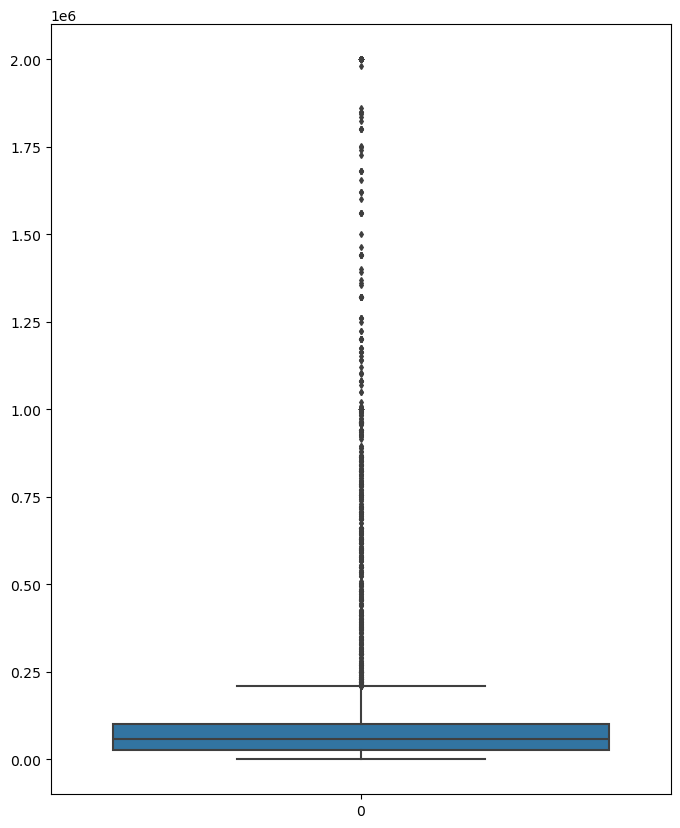

In [33]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df['ConvertedComp'],fliersize=3)


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [34]:
# iqr can be found by subtracting the lower quartile range from the upper quartile range.
iqr = (df['ConvertedComp'].quantile(0.75))-(df['ConvertedComp'].quantile(0.25))
print(f"The Inter Quartile Range of ConvertedComp is: {iqr}")

The Inter Quartile Range of ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [35]:
#First we have to multiply the inter quartile range by 1.5 and then subtract or add the lower quartile and upper quartile values. 
lower_bound = (df['ConvertedComp'].quantile(0.25)) - iqr*1.5
upper_bound = (df['ConvertedComp'].quantile(.75)) + iqr*1.5

print(f"The lower bound of the ConvertedComp is: {lower_bound} \nAnd the upper bound is {upper_bound}")

The lower bound of the ConvertedComp is: -82830.0 
And the upper bound is 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [36]:
#Currently the list of outliers is unknown so we set it to 0
outliers = 0

#For each number outside of the upper and lower bound +1 to outliers 
for i in df['ConvertedComp']:
    if (i < lower_bound) or (i > upper_bound):
        outliers += 1

print(f"The number of outliers in ConvertedComp is: {outliers}")

The number of outliers in ConvertedComp is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
#First we have to define the outlier set and then drop that from the dataFrame.
outlier_set = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].index
dataframe = df.drop(outlier_set)
print(f"Dataframe shape with outliers {df.shape}")
print(f"Dataframe shape without outliers {dataframe.shape}")

Dataframe shape with outliers (11398, 85)
Dataframe shape without outliers (10519, 85)


## Correlation


### Finding correlation


We can find the correlation between Age and all other numerical columns.

In [38]:
# Finding the columns with numerical values first.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].corrwith(df['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
